# Comparative Study

### Part A

In [1]:
# Importing the packages

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, BayesianRidge 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    f1_score,
    r2_score
)

In [2]:
# Reading the data

dat = pd.read_csv('CE802_P2_Data.csv')

# working on a copy

p2_dat = dat.copy()

print("Data Dimensions:", p2_dat.shape)

Data Dimensions: (1000, 21)


In [3]:
p2_dat.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,1.89,-8.5830,-1.50460,11.50410,4.4970,5312.73,10513.35,-4.5049,-2054.06,8175.8,...,2.56680,0,-120619.89,-3.22700,0,-2729.56,-16399.900,76.268,36.14,True
1,1.89,-7.0980,-2.37700,21.34500,7.3720,5559.36,10407.48,-6.4940,-2321.38,7003.8,...,1.99590,0,-120878.43,-3.49700,0,-2190.92,-16142.442,124.920,NaN,False
2,0.89,-3.4773,-1.32840,12.75900,4.7412,5738.31,12592.80,-4.2148,-1356.66,5833.4,...,1.65543,1,-120891.63,-2.18837,0,-2666.92,-16405.900,140.160,NaN,False
3,1.89,-7.3560,-1.54190,10.89780,5.3462,5212.26,10991.70,-5.8380,-2203.16,6939.0,...,3.54600,0,-120880.17,-4.00400,1,-2711.48,-16144.602,78.726,37.48,True
4,0.89,-2.4108,-1.20719,8.76876,8.5620,11869.92,10543.98,-4.4772,-2567.76,6879.2,...,2.23360,1,-120826.71,-2.48830,1,-2611.70,-15003.500,92.800,NaN,False


In [4]:
p2_dat.isnull()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [5]:
# Number of null values in the df

p2_dat.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20      500
Class      0
dtype: int64

<AxesSubplot:>

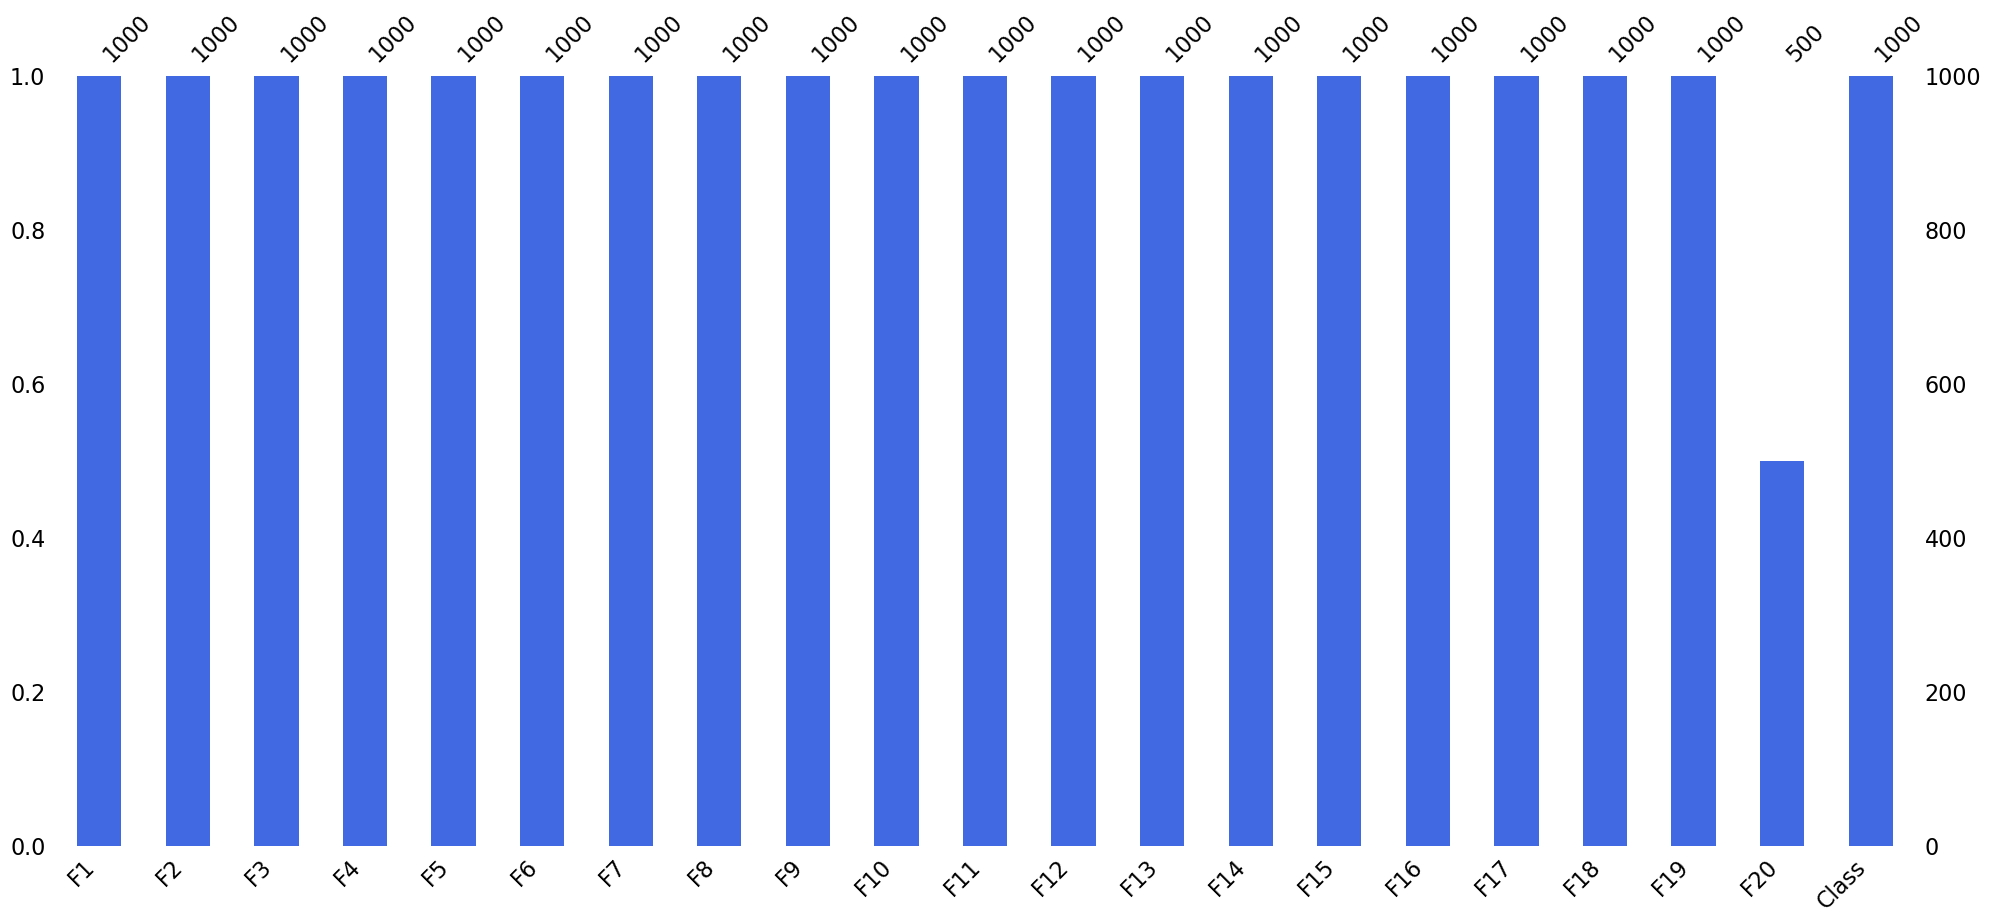

In [6]:
# visualising the null values

msno.bar(p2_dat, color="royalblue")

<AxesSubplot:>

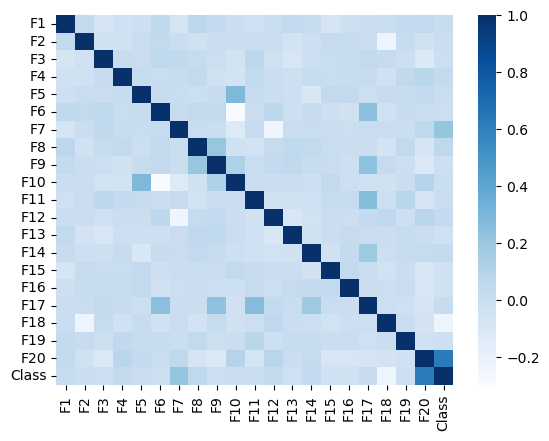

In [7]:
# correlation computation
correlation = p2_dat.corr()
sns.heatmap(correlation, annot=False, cmap='Blues')

In [8]:
p2_dat.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,1.397000,-4.695798,-1.653968,11.573618,6.108717,5515.453754,11128.128917,-5.058608,-2143.218490,6594.407898,-3.740958,2.520013,0.508000,-120989.462060,-2.930605,0.516000,-2592.387215,-16777.828266,90.724599,31.280200
std,0.500201,2.699756,0.765717,2.708288,1.739357,1534.747192,1587.054314,0.901204,702.890861,1494.941683,0.902777,0.853456,0.500186,5064.689413,0.606601,0.499994,493.077434,2074.355688,20.571395,2.311671
min,0.890000,-14.976000,-7.209000,8.706600,4.264440,-4924.080000,1686.600000,-8.675000,-5873.260000,-3367.200000,-7.238000,1.621290,0.000000,-279151.140000,-5.964000,0.000000,-5874.120000,-32323.100000,70.424656,24.560000
25%,0.890000,-6.144750,-1.843675,9.559425,4.806650,5108.820000,10513.050000,-5.427000,-2424.337500,6432.700000,-4.153500,1.889000,0.000000,-120901.470000,-3.265750,0.000000,-2766.202500,-17004.850000,76.804000,29.680000
50%,1.890000,-3.824400,-1.348400,10.721100,5.598100,5482.585500,10770.135000,-4.777250,-2281.570000,6971.700000,-3.462250,2.248750,1.000000,-120843.480000,-2.792350,1.000000,-2700.060000,-16364.700000,84.584000,31.240000
75%,1.890000,-2.590725,-1.178988,12.762750,6.879000,5917.620000,11235.600000,-4.381825,-2049.885000,7225.106500,-3.047450,2.885000,1.000000,-120787.035000,-2.446800,1.000000,-2565.445000,-15977.540000,96.325000,32.830000
max,1.890000,-1.774140,-1.130002,22.176000,13.290000,17287.920000,27822.600000,-4.122990,2671.740000,14678.800000,-2.752120,6.073000,1.000000,-109690.140000,-2.170056,1.000000,587.880000,-7663.100000,233.980000,38.040000


Data skewness



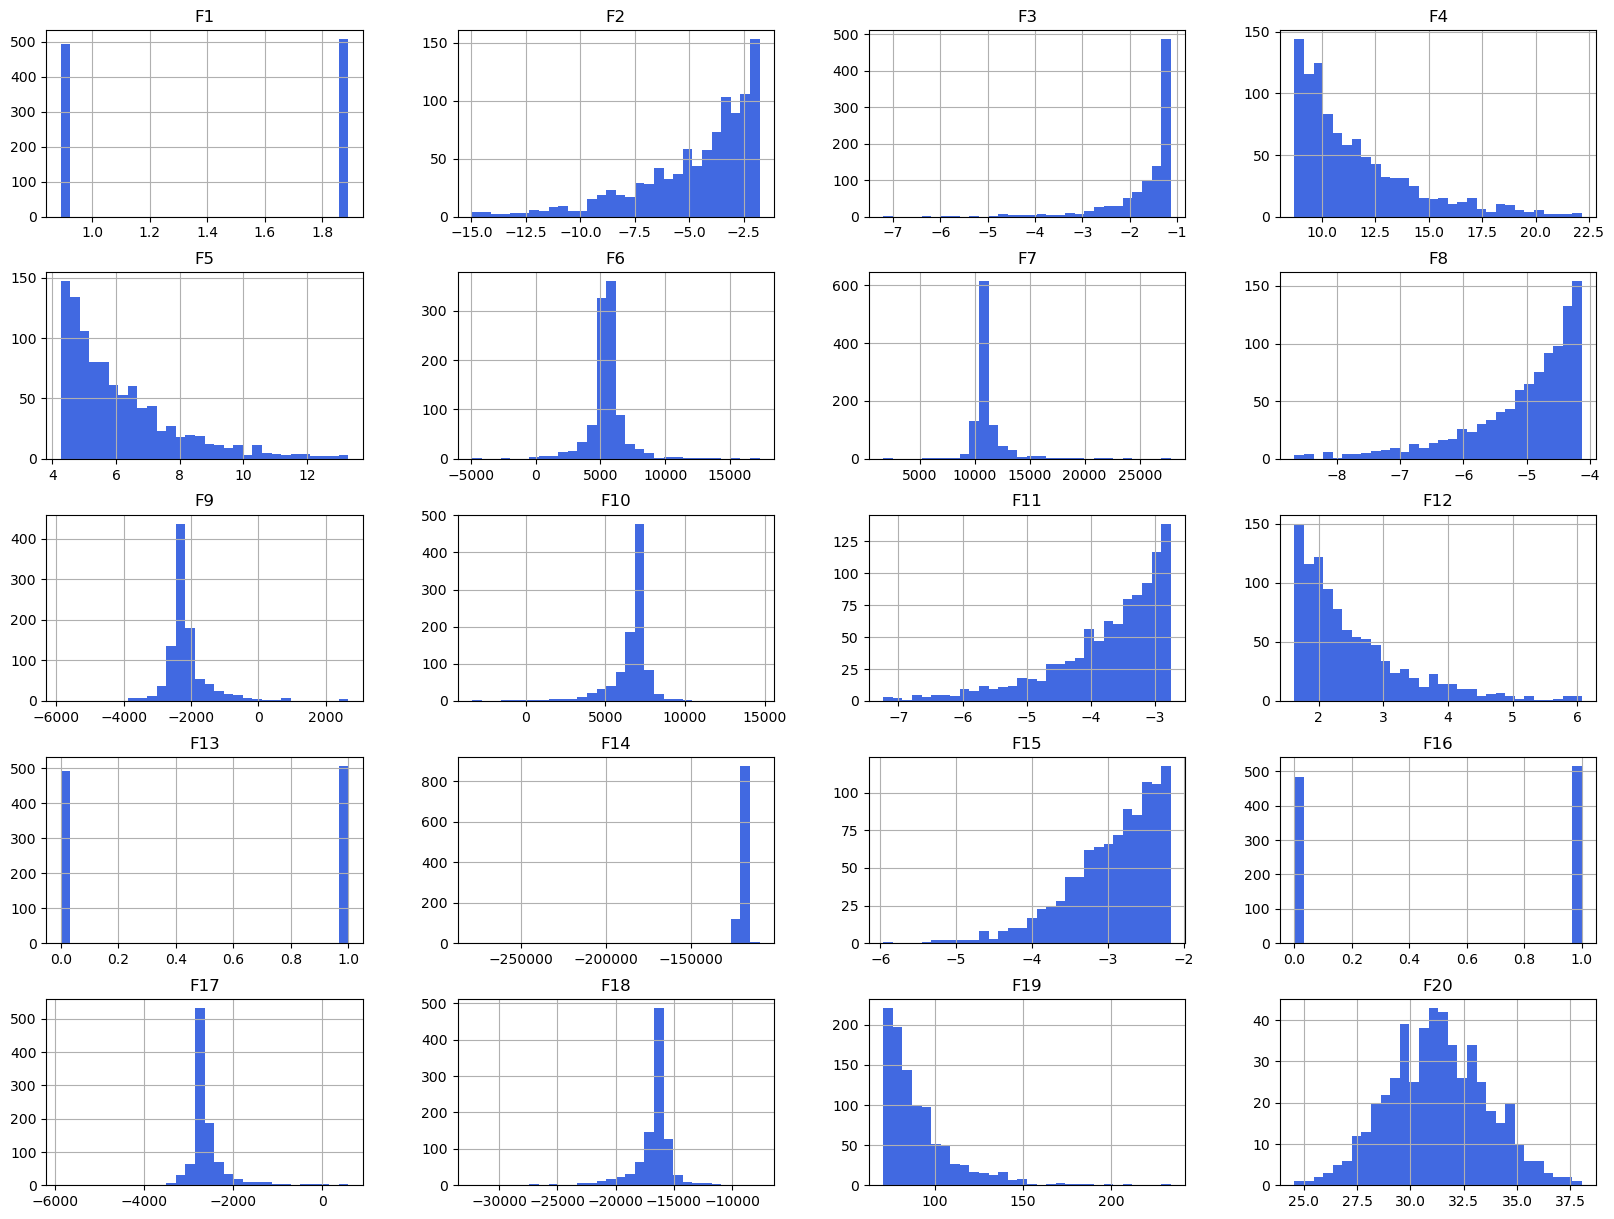

<Figure size 640x480 with 0 Axes>

In [9]:
print('Data skewness\n')
p2_dat.hist(bins=30, figsize=(20, 15), color="royalblue")
plt.figure()
plt.show()   

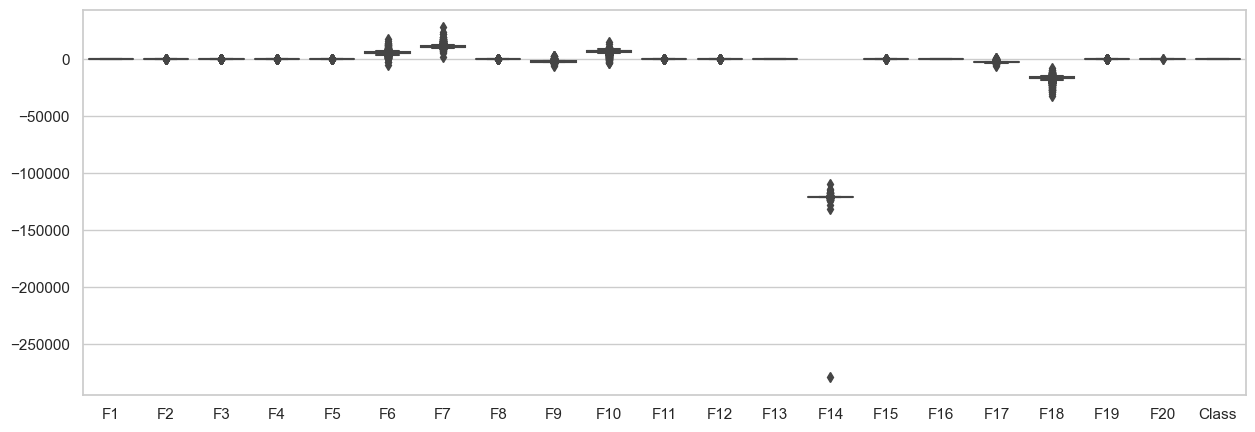

In [10]:
# Checking outliers by box plot

sns.set(style="whitegrid")
fig, axis = plt.subplots(figsize=(15,5)) 
sns.boxplot(data = p2_dat, ax=axis)
plt.show()

In [11]:
# Data preprocesing
# Baseline approach - removing the column
p2_dat_nona_base = p2_dat.dropna(axis=1)

# splitting the attributes
a = p2_dat_nona_base.drop('Class', axis = 1) # values of independent variable
b = p2_dat_nona_base['Class'] # values of target/dependent variable

# b = LabelEncoder().fit_transform(b)

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42) # 80% training 20% test

# standardizing the values with standard scaler()
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

In [12]:
p2_dat_nona_base.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
Class    0
dtype: int64

In [13]:
# independent variables

a.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,1.89,-8.5830,-1.50460,11.50410,4.4970,5312.73,10513.35,-4.5049,-2054.06,8175.8,-5.2130,2.56680,0,-120619.89,-3.22700,0,-2729.56,-16399.900,76.268
1,1.89,-7.0980,-2.37700,21.34500,7.3720,5559.36,10407.48,-6.4940,-2321.38,7003.8,-2.8888,1.99590,0,-120878.43,-3.49700,0,-2190.92,-16142.442,124.920
2,0.89,-3.4773,-1.32840,12.75900,4.7412,5738.31,12592.80,-4.2148,-1356.66,5833.4,-4.3600,1.65543,1,-120891.63,-2.18837,0,-2666.92,-16405.900,140.160
3,1.89,-7.3560,-1.54190,10.89780,5.3462,5212.26,10991.70,-5.8380,-2203.16,6939.0,-4.2560,3.54600,0,-120880.17,-4.00400,1,-2711.48,-16144.602,78.726
4,0.89,-2.4108,-1.20719,8.76876,8.5620,11869.92,10543.98,-4.4772,-2567.76,6879.2,-3.1384,2.23360,1,-120826.71,-2.48830,1,-2611.70,-15003.500,92.800


In [14]:
# target variable

print(b)

0       True
1      False
2      False
3       True
4      False
       ...  
995     True
996    False
997     True
998    False
999    False
Name: Class, Length: 1000, dtype: bool


### Prediction with Baseline Approach

In [15]:
# Decision Tree classifer

DescClassifer = DecisionTreeClassifier()
DescClassifer = DescClassifer.fit(a_train, b_train)

b_pred = DescClassifer.predict(a_test)

# Printing the accuracy of the model
DT_accuracy1 = metrics.accuracy_score(b_test, b_pred)
print("DT Accuracy:",DT_accuracy1)

DT Accuracy: 0.845


              precision    recall  f1-score   support

       False       0.81      0.86      0.83        90
        True       0.88      0.84      0.86       110

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



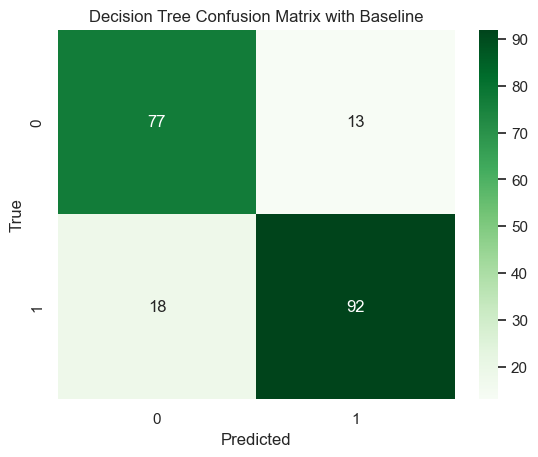

In [16]:
cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True, fmt=",d", cmap = "Greens")
print(classification_report(b_test, b_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix with Baseline')
plt.show()

knn Accuracy: 0.59
              precision    recall  f1-score   support

       False       0.54      0.64      0.59        90
        True       0.65      0.55      0.59       110

    accuracy                           0.59       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.60      0.59      0.59       200



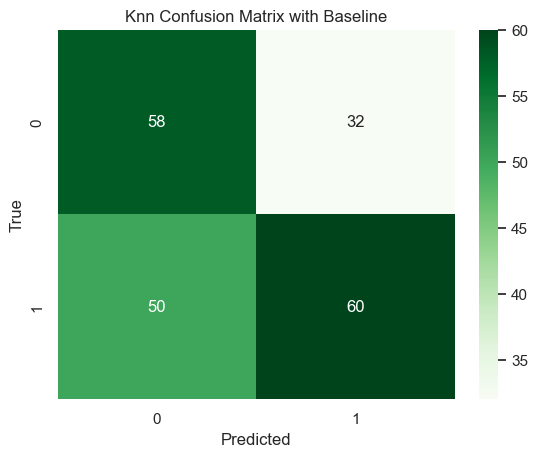

In [17]:
# KNN model

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(a_train, b_train)

b_pred = knn.predict(a_test)

knn_accuracy1 = accuracy_score(b_test, b_pred)

print("knn Accuracy: {}".format(knn_accuracy1))

cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True, fmt=",d", cmap = "Greens")
print(classification_report(b_test, b_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Knn Confusion Matrix with Baseline')
plt.show()

SVM Accuracy: 0.685
              precision    recall  f1-score   support

       False       0.63      0.72      0.67        90
        True       0.74      0.65      0.70       110

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.69       200



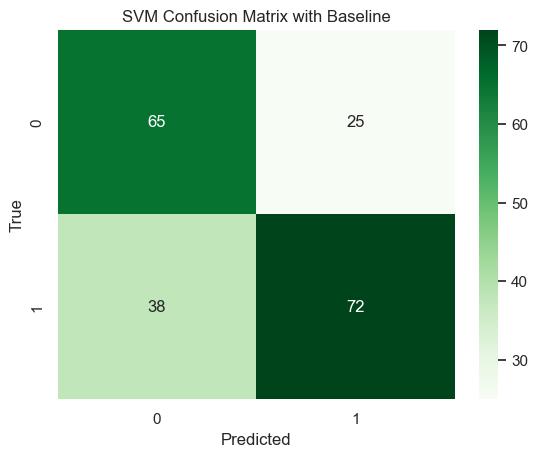

In [18]:
# Support vector Machine
svm = SVC()

# fitting the model with training data
svm.fit(a_train, b_train)

# prediction
b_pred = svm.predict(a_test)

# accuracy
svm_accuracy1 = accuracy_score(b_test, b_pred)
print("SVM Accuracy: {}".format(svm_accuracy1))

cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True, fmt=",d", cmap = "Greens")
print(classification_report(b_test, b_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix with Baseline')
plt.show()

rfc Accuracy: 0.84
              precision    recall  f1-score   support

       False       0.82      0.82      0.82        90
        True       0.85      0.85      0.85       110

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



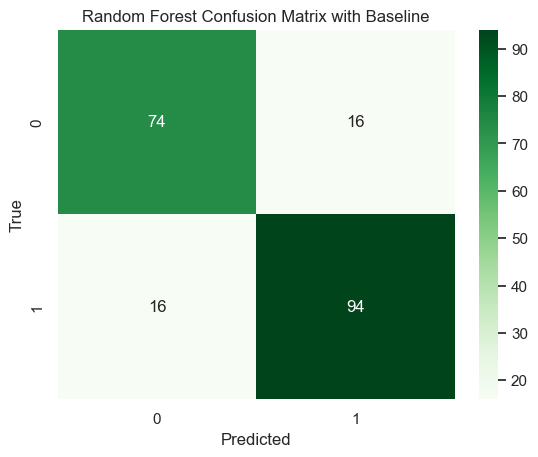

In [19]:
# Random Forest

rfc = RandomForestClassifier(random_state=42)

rfc.fit(a_train, b_train)

b_pred = rfc.predict(a_test)

# accuracy
rfc_accuracy1 = accuracy_score(b_test, b_pred)
print("rfc Accuracy: {}".format(rfc_accuracy1))

cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True, fmt=",d", cmap = "Greens")
print(classification_report(b_test, b_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix with Baseline')
plt.show()

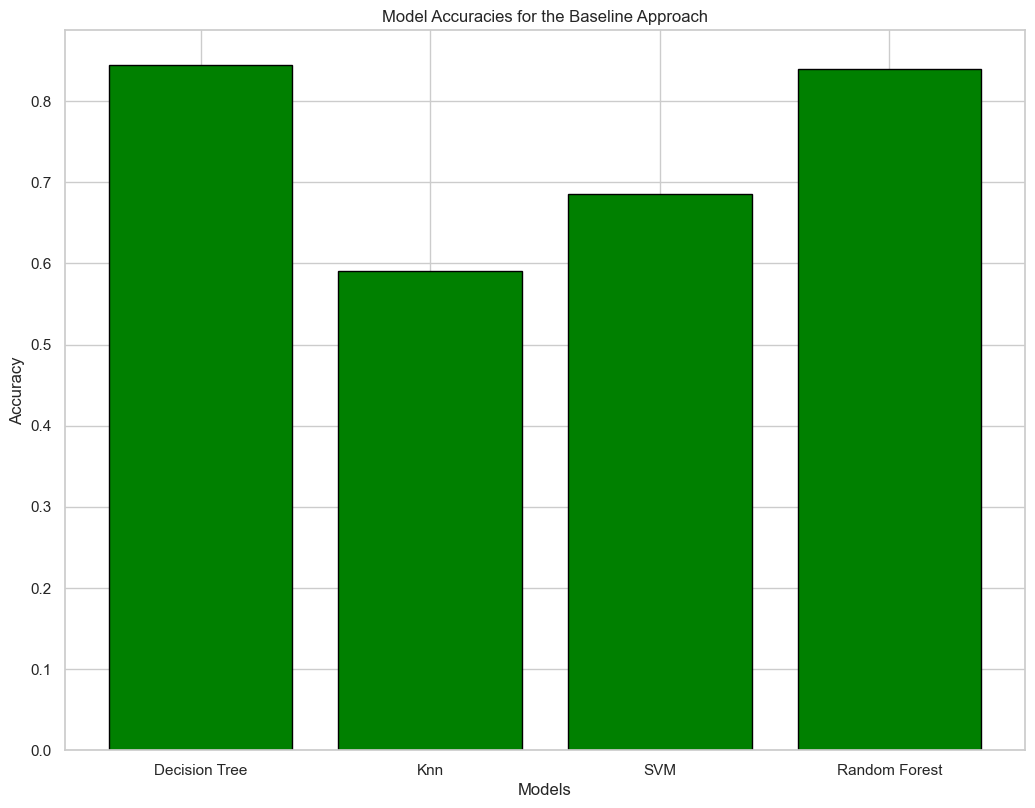

In [20]:
models = ["Decision Tree","Knn","SVM","Random Forest"]
accuracies = [DT_accuracy1, knn_accuracy1, svm_accuracy1, rfc_accuracy1]
accfig = plt.figure()
axis = accfig.add_axes([0,0,1.5,1.5])
axis.set_title('Model Accuracies for the Baseline Approach')
axis.set_xlabel('Models')
axis.set_ylabel('Accuracy')
axis.bar(models,accuracies, color="green", edgecolor='black')
plt.show()

### Prediction with BayesianRidge Imputation

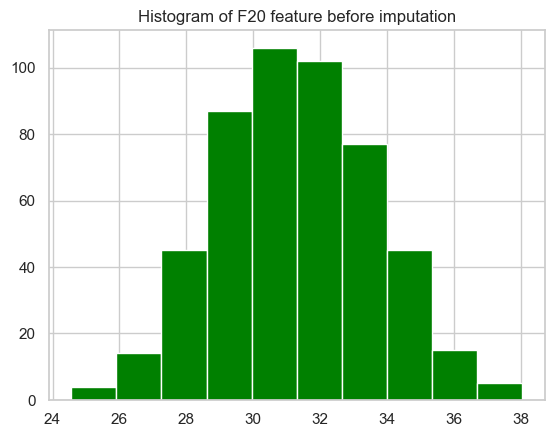

In [21]:
p2_dat1 = pd.read_csv('CE802_P2_Data.csv')

p2_copydat1 = p2_dat1.copy()

# splitting the attributes
a = p2_copydat1.drop('Class', axis = 1) # values of independent variable
b = p2_copydat1['Class'] # values of target/dependent variable

plt.hist(a['F20'], color="Green")
plt.title('Histogram of F20 feature before imputation')
plt.show()

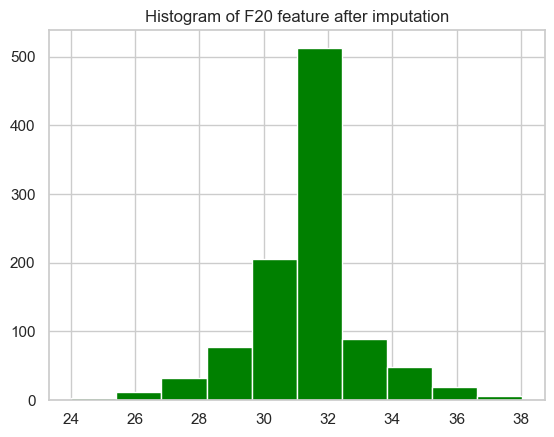

In [22]:
# Data preprocessing

# Impute missing values using BayesianRidge
imputer = IterativeImputer(estimator = BayesianRidge(), random_state=0)
a_imputed = imputer.fit_transform(a)

plt.hist(a_imputed[:, -1], color="Green")
plt.title('Histogram of F20 feature after imputation')
plt.show()

a_train, a_test, b_train, b_test = train_test_split(a_imputed, b, test_size=0.2, random_state=42) # 80% training 20% test

# standardizing the values with standard scaler()
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

In [23]:
# Decision Tree classifer

DescClassifer = DecisionTreeClassifier()
DescClassifer = DescClassifer.fit(a_train, b_train)

b_pred = DescClassifer.predict(a_test)

# Printing the accuracy of the model
DT_accuracy2 = metrics.accuracy_score(b_test, b_pred)
print("DT Accuracy:",DT_accuracy2)

DT Accuracy: 0.88


              precision    recall  f1-score   support

       False       0.87      0.87      0.87        90
        True       0.89      0.89      0.89       110

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



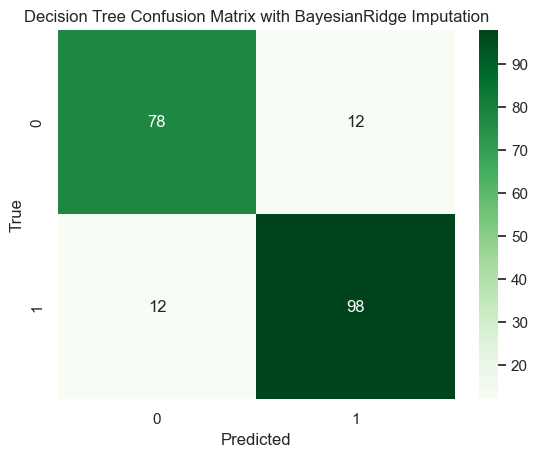

In [24]:
cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True, fmt=",d", cmap = "Greens")
print(classification_report(b_test, b_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix with BayesianRidge Imputation')
plt.show()

knn Accuracy: 0.63
              precision    recall  f1-score   support

       False       0.58      0.66      0.61        90
        True       0.68      0.61      0.64       110

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.64      0.63      0.63       200



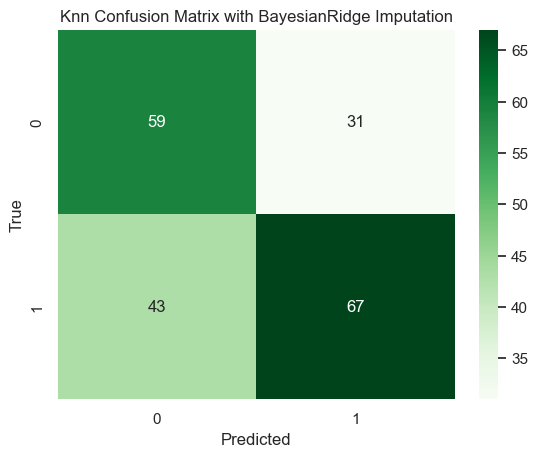

In [25]:
# KNN model

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(a_train, b_train)

b_pred = knn.predict(a_test)

knn_accuracy2 = accuracy_score(b_test, b_pred)

print("knn Accuracy: {}".format(knn_accuracy2))

cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True, fmt=",d", cmap = "Greens")
print(classification_report(b_test, b_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Knn Confusion Matrix with BayesianRidge Imputation')
plt.show()


SVM Accuracy: 0.73
              precision    recall  f1-score   support

       False       0.69      0.73      0.71        90
        True       0.77      0.73      0.75       110

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



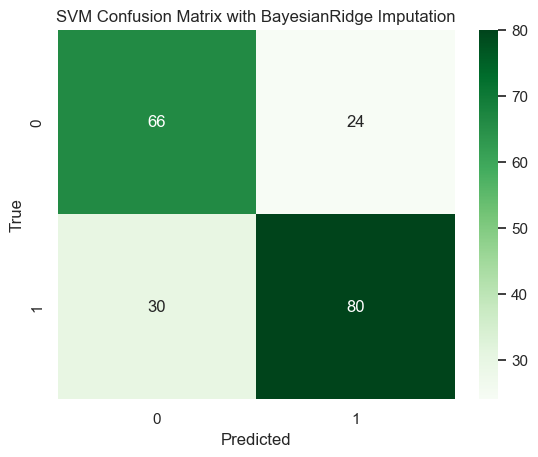

In [26]:
# Support vector Machine
svm = SVC()

# fitting the model with training data
svm.fit(a_train, b_train)

# prediction
b_pred = svm.predict(a_test)

# accuracy
svm_accuracy2 = accuracy_score(b_test, b_pred)
print("SVM Accuracy: {}".format(svm_accuracy2))

cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True, fmt=",d", cmap = "Greens")
print(classification_report(b_test, b_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix with BayesianRidge Imputation')
plt.show()

rfc Accuracy: 0.845
              precision    recall  f1-score   support

       False       0.84      0.81      0.82        90
        True       0.85      0.87      0.86       110

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



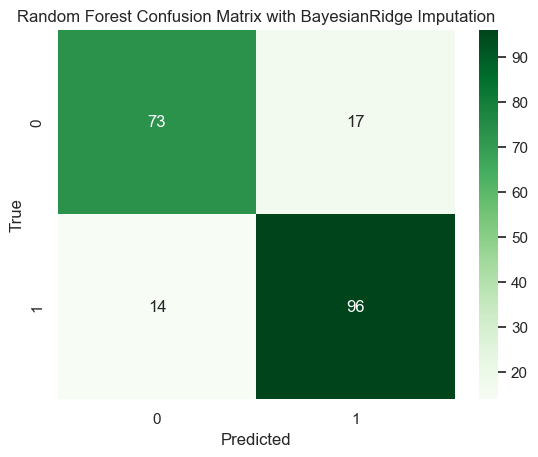

In [27]:
# Random Forest

rfc = RandomForestClassifier(random_state=42)

rfc.fit(a_train, b_train)

b_pred = rfc.predict(a_test)

# accuracy
rfc_accuracy2 = accuracy_score(b_test, b_pred)
print("rfc Accuracy: {}".format(rfc_accuracy2))

cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True, fmt=",d", cmap = "Greens")
print(classification_report(b_test, b_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix with BayesianRidge Imputation')
plt.show()


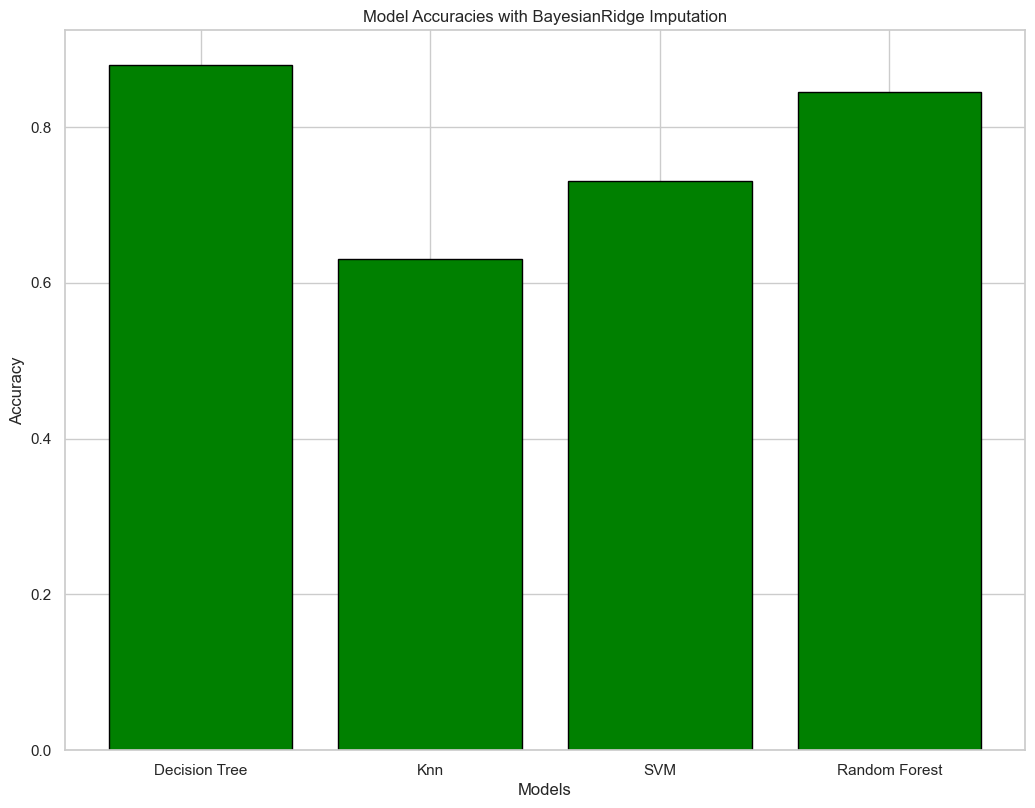

In [28]:
models = ["Decision Tree","Knn","SVM","Random Forest"]
accuracies = [DT_accuracy2, knn_accuracy2, svm_accuracy2, rfc_accuracy2]
accfig = plt.figure()
axis = accfig.add_axes([0,0,1.5,1.5])
axis.set_title('Model Accuracies with BayesianRidge Imputation')
axis.set_xlabel('Models')
axis.set_ylabel('Accuracy')
axis.bar(models,accuracies, color="green", edgecolor='black')
plt.show()

### Prediction with KNN Imputation

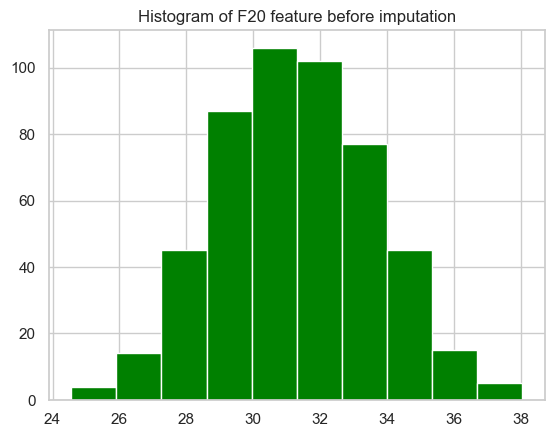

In [29]:
p2_dat = pd.read_csv('CE802_P2_Data.csv')

p2_data_copy = p2_dat.copy()

# splitting the attributes
a = p2_data_copy.drop('Class', axis = 1) # values of independent variable
b = p2_data_copy['Class'] # values of target/dependent variable

plt.hist(a['F20'], color="Green")
plt.title('Histogram of F20 feature before imputation')
plt.show()

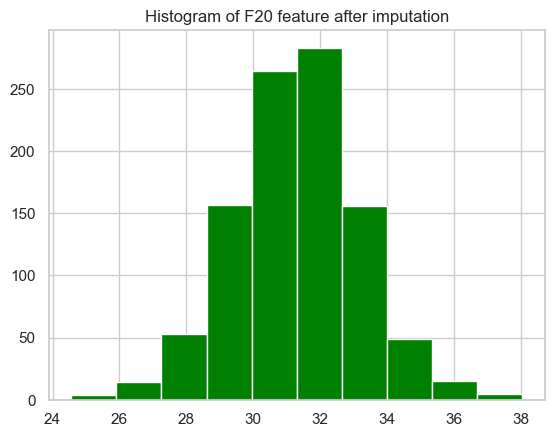

In [30]:
# Impute missing values using KNNImputer

imputer = KNNImputer(n_neighbors=5)
a_imputed = imputer.fit_transform(a)

plt.hist(a_imputed[:, -1], color="Green")
plt.title('Histogram of F20 feature after imputation')
plt.show()

a_train, a_test, b_train, b_test = train_test_split(a_imputed, b, test_size=0.2, random_state=42) # 80% training 20% test

# standardizing the values with standard scaler()
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

In [31]:
# Decision Tree classifer

DescClassifer = DecisionTreeClassifier()
DescClassifer = DescClassifer.fit(a_train, b_train)

b_pred = DescClassifer.predict(a_test)

# Printing the accuracy of the model
DT_accuracy3 = metrics.accuracy_score(b_test, b_pred)
print("DT Accuracy:",DT_accuracy3)


DT Accuracy: 0.86


              precision    recall  f1-score   support

       False       0.83      0.87      0.85        90
        True       0.89      0.85      0.87       110

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



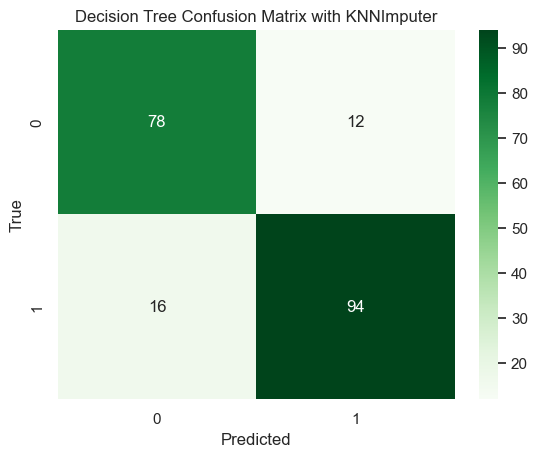

In [32]:
cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True, fmt=",d", cmap = "Greens")
print(classification_report(b_test, b_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix with KNNImputer')
plt.show()

knn Accuracy: 0.645
              precision    recall  f1-score   support

       False       0.59      0.67      0.63        90
        True       0.70      0.63      0.66       110

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.64       200
weighted avg       0.65      0.65      0.65       200



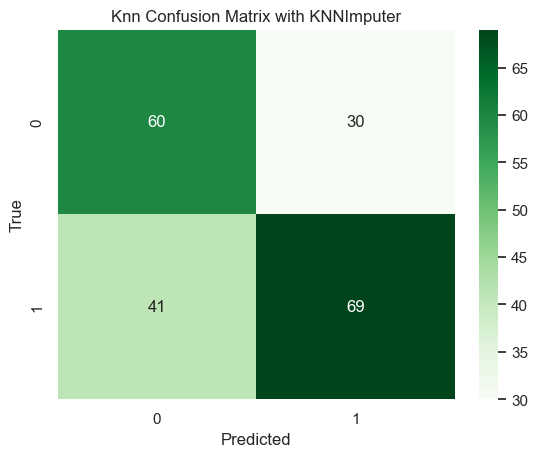

In [33]:
# KNN model

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(a_train, b_train)

b_pred = knn.predict(a_test)

knn_accuracy3 = accuracy_score(b_test, b_pred)

print("knn Accuracy: {}".format(knn_accuracy3))

cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True, fmt=",d", cmap = "Greens")
print(classification_report(b_test, b_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Knn Confusion Matrix with KNNImputer')
plt.show()

SVM Accuracy: 0.72
              precision    recall  f1-score   support

       False       0.68      0.71      0.70        90
        True       0.75      0.73      0.74       110

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



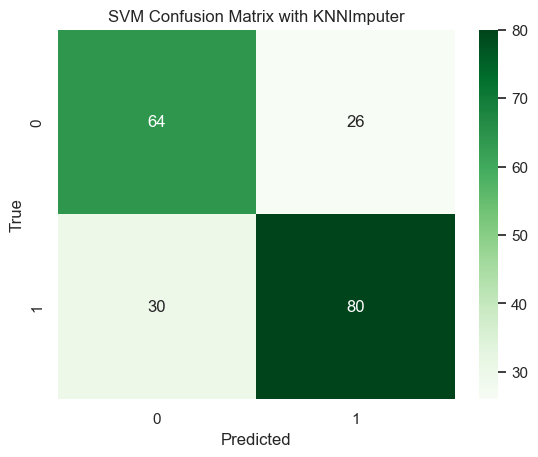

In [34]:
# Support vector Machine
svm = SVC()

# fitting the model with training data
svm.fit(a_train, b_train)

# prediction
b_pred = svm.predict(a_test)

# accuracy
svm_accuracy3 = accuracy_score(b_test, b_pred)
print("SVM Accuracy: {}".format(svm_accuracy3))

cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True, fmt=",d", cmap = "Greens")
print(classification_report(b_test, b_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix with KNNImputer')
plt.show()


rfc Accuracy: 0.81
              precision    recall  f1-score   support

       False       0.80      0.78      0.79        90
        True       0.82      0.84      0.83       110

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



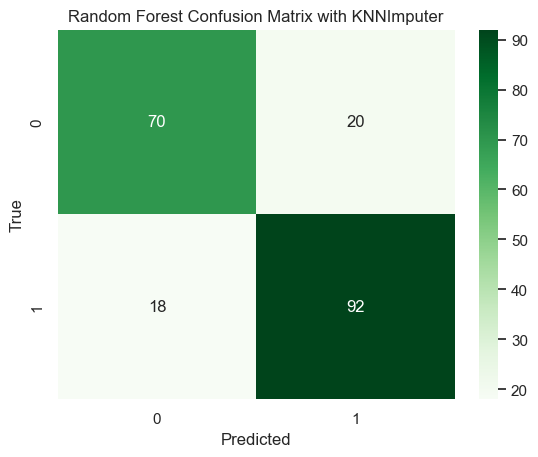

In [35]:
# Random Forest

rfc = RandomForestClassifier(random_state=42)

rfc.fit(a_train, b_train)

b_pred = rfc.predict(a_test)

# accuracy
rfc_accuracy3 = accuracy_score(b_test, b_pred)
print("rfc Accuracy: {}".format(rfc_accuracy3))

cm = confusion_matrix(b_test, b_pred)
sns.heatmap(cm, annot=True, fmt=",d", cmap = "Greens")
print(classification_report(b_test, b_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix with KNNImputer')
plt.show()

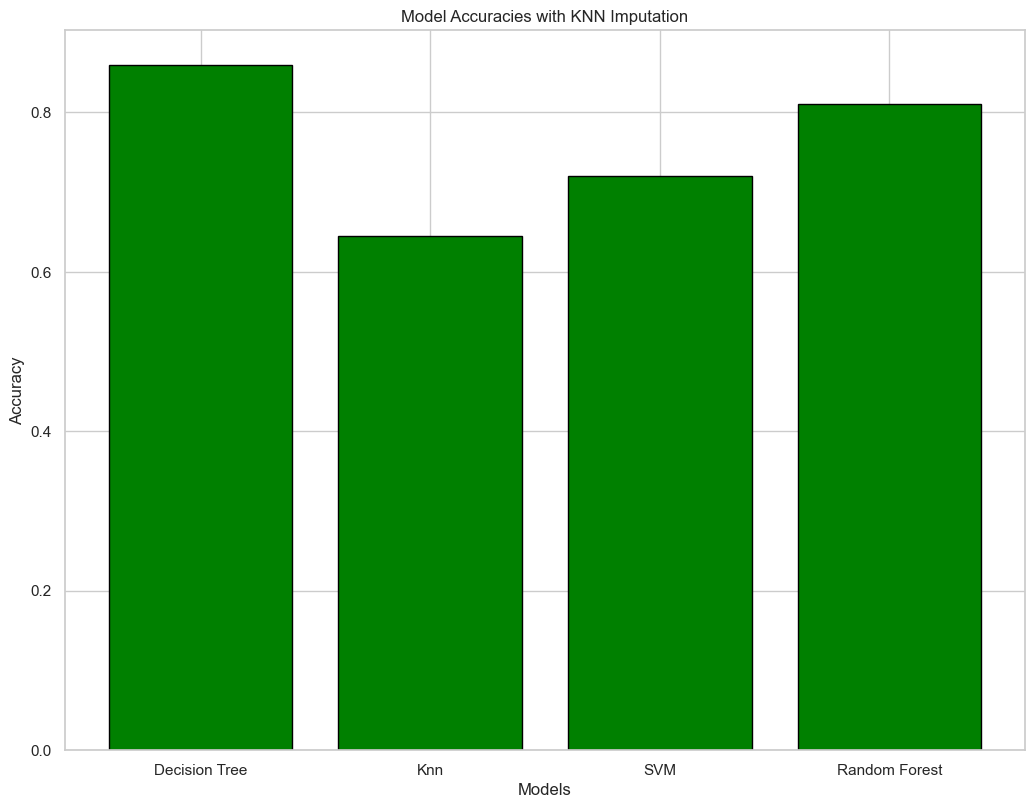

In [36]:
# visualizing the results

models = ["Decision Tree","Knn","SVM","Random Forest"]
accuracies = [DT_accuracy3, knn_accuracy3, svm_accuracy3, rfc_accuracy3]
accfig = plt.figure()
axis = accfig.add_axes([0,0,1.5,1.5])
axis.set_title('Model Accuracies with KNN Imputation')
axis.set_xlabel('Models')
axis.set_ylabel('Accuracy')
axis.bar(models,accuracies, color="green", edgecolor='black')
plt.show()

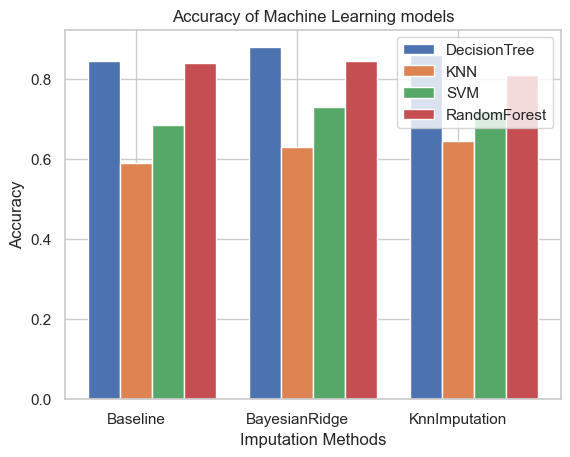

In [37]:
# visualizing the results

values1=[DT_accuracy1, DT_accuracy2, DT_accuracy3]
values2=[knn_accuracy1, knn_accuracy2, knn_accuracy3]
values3=[svm_accuracy1, svm_accuracy2, svm_accuracy3]
values4=[rfc_accuracy1, rfc_accuracy2, rfc_accuracy3]

fig, ax = plt.subplots()
bar_width = 0.2

#x positions for the bars
x_pos1 = [1-bar_width, 2-bar_width, 3-bar_width]
x_pos2 = [1, 2, 3]
x_pos3 = [1+bar_width, 2+bar_width, 3+bar_width]
x_pos4 = [1+(2*bar_width), 2+(2*bar_width), 3+(2*bar_width)]

# bars for each value list
bar1 = ax.bar(x_pos1, values1, bar_width, label='DecisionTree')
bar2 = ax.bar(x_pos2, values2, bar_width, label='KNN')
bar3 = ax.bar(x_pos3, values3, bar_width, label='SVM')
bar4 = ax.bar(x_pos4, values4, bar_width, label='RandomForest')

ax.set_xlabel('Imputation Methods')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Machine Learning models')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Baseline', 'BayesianRidge', 'KnnImputation'])
ax.legend()
plt.show()

### Part B

In [38]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

# Data preprocessing
# Impute missing values using BayesianRidge
imputer = IterativeImputer(estimator = BayesianRidge(), random_state=0)
test_data['F20'] = pd.DataFrame(imputer.fit_transform(test_data['F20'].values.reshape(-1,1)))

scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_data)

# Using the best performed model - DT
predicted = DescClassifer.predict(test_data_scaled) # CHANGED HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])

In [39]:
# Calculating the amount of patients with high risk of diabetes

tested_df = pd.read_csv('CE802_P2_Test_Predictions.csv')
tested_df['Class'].value_counts()

False    530
True     470
Name: Class, dtype: int64